## Import the Libraries

In [1]:
#Import the libraries
suppressWarnings({
    
library(ggplot2)
library(dplyr)
library(tidyverse)
library(randomForest)
library(corrplot)
# library(explore)
library(caret)
library(pROC)
library(e1071)
library(corrplot)
    
})

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package

## Load the datset

In [2]:
#Load the dataset
heart_failure_dataset <- read.csv("C:/Users/moham/DataScience/Predictive modeling/PM_ projects/Final Project/heart_failure_dataset.csv")

In [3]:
#Display the first few rows
head(heart_failure_dataset)


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
75,No,582,No,20,Yes,265000,1.9,130,Male,No,4,Yes
55,No,7861,No,38,No,263358,1.1,136,Male,No,6,Yes
65,No,146,No,20,No,162000,1.3,129,Male,Yes,7,Yes
50,Yes,111,No,20,No,210000,1.9,137,Male,No,7,Yes
65,Yes,160,Yes,20,No,327000,2.7,116,Female,No,8,Yes
90,Yes,47,No,40,Yes,204000,2.1,132,Male,Yes,8,Yes


In [4]:
#last rows of the datset
tail(heart_failure_dataset)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
294,63,Yes,103,Yes,35,No,179000,0.9,136,Male,Yes,270,No
295,62,No,61,Yes,38,Yes,155000,1.1,143,Male,Yes,270,No
296,55,No,1820,No,38,No,270000,1.2,139,Female,No,271,No
297,45,No,2060,Yes,60,No,742000,0.8,138,Female,No,278,No
298,45,No,2413,No,38,No,140000,1.4,140,Male,Yes,280,No
299,50,No,196,No,45,No,395000,1.6,136,Male,Yes,285,No


In [5]:
#Column names 
colnames(heart_failure_dataset)


[1] "age"                      "anaemia"                 
 [3] "creatinine_phosphokinase" "diabetes"                
 [5] "ejection_fraction"        "high_blood_pressure"     
 [7] "platelets"                "serum_creatinine"        
 [9] "serum_sodium"             "gender"                  
[11] "smoking"                  "time"                    
[13] "DEATH_EVENT"

In [6]:
#summary of dataset
summary(heart_failure_dataset)

      age        anaemia   creatinine_phosphokinase diabetes  ejection_fraction
 Min.   :40.00   No :170   Min.   :  23.0           No :174   Min.   :14.00    
 1st Qu.:51.00   Yes:129   1st Qu.: 116.5           Yes:125   1st Qu.:30.00    
 Median :60.00             Median : 250.0                     Median :38.00    
 Mean   :60.83             Mean   : 581.8                     Mean   :38.08    
 3rd Qu.:70.00             3rd Qu.: 582.0                     3rd Qu.:45.00    
 Max.   :95.00             Max.   :7861.0                     Max.   :80.00    
 high_blood_pressure   platelets      serum_creatinine  serum_sodium  
 No :194             Min.   : 25100   Min.   :0.500    Min.   :113.0  
 Yes:105             1st Qu.:212500   1st Qu.:0.900    1st Qu.:134.0  
                     Median :262000   Median :1.100    Median :137.0  
                     Mean   :263358   Mean   :1.394    Mean   :136.6  
                     3rd Qu.:303500   3rd Qu.:1.400    3rd Qu.:140.0  
              

In [7]:
#structure of dataset
str(heart_failure_dataset)

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 2 2 2 1 2 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 2 1 1 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 2 1 1 1 2 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ gender                  : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 2 2 1 2 ...
 $ smoking                 : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 2 1 2 1 2 ...
 $ time                    : int  4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : 

In [8]:
#check for missing values
sum(is.na(heart_failure_dataset))

[1] 0

In [9]:
column_classes <- sapply(heart_failure_dataset,class)
print(column_classes)

                     age                  anaemia creatinine_phosphokinase 
               "numeric"                 "factor"                "integer" 
                diabetes        ejection_fraction      high_blood_pressure 
                "factor"                "integer"                 "factor" 
               platelets         serum_creatinine             serum_sodium 
               "numeric"                "numeric"                "integer" 
                  gender                  smoking                     time 
                "factor"                 "factor"                "integer" 
             DEATH_EVENT 
                "factor" 


In [10]:
# converting the categorical column to as a factor
heart_failure_dataset$anaemia <- as.factor(heart_failure_dataset$anaemia)
heart_failure_dataset$diabetes <- as.factor(heart_failure_dataset$diabetes)
heart_failure_dataset$high_blood_pressure <- as.factor(heart_failure_dataset$high_blood_pressure )
heart_failure_dataset$smoking <- as.factor(heart_failure_dataset$smoking)
heart_failure_dataset$gender <- as.factor(heart_failure_dataset$gender)
heart_failure_dataset$DEATH_EVENT <- as.factor(heart_failure_dataset$DEATH_EVENT)

In [11]:
# Divide the categorical and numerical columns

## Create an empty lists
cat_col <- character(0)
num_col <- character(0)

for (col in colnames(heart_failure_dataset)) {
  if (is.factor(heart_failure_dataset[[col]])) {
    cat_col <- c(cat_col, col)
  } else if (is.numeric(heart_failure_dataset[[col]])) {
    num_col <- c(num_col, col)
  }
}

#Display the categorical and numerical columns lists
print("Categorical columns:")
cat_col

print("Numerical columns:")
num_col  

[1] "Categorical columns:"


[1] "anaemia"             "diabetes"            "high_blood_pressure"
[4] "gender"              "smoking"             "DEATH_EVENT"

[1] "Numerical columns:"


[1] "age"                      "creatinine_phosphokinase"
[3] "ejection_fraction"        "platelets"               
[5] "serum_creatinine"         "serum_sodium"            
[7] "time"

## Exploratory data analysis

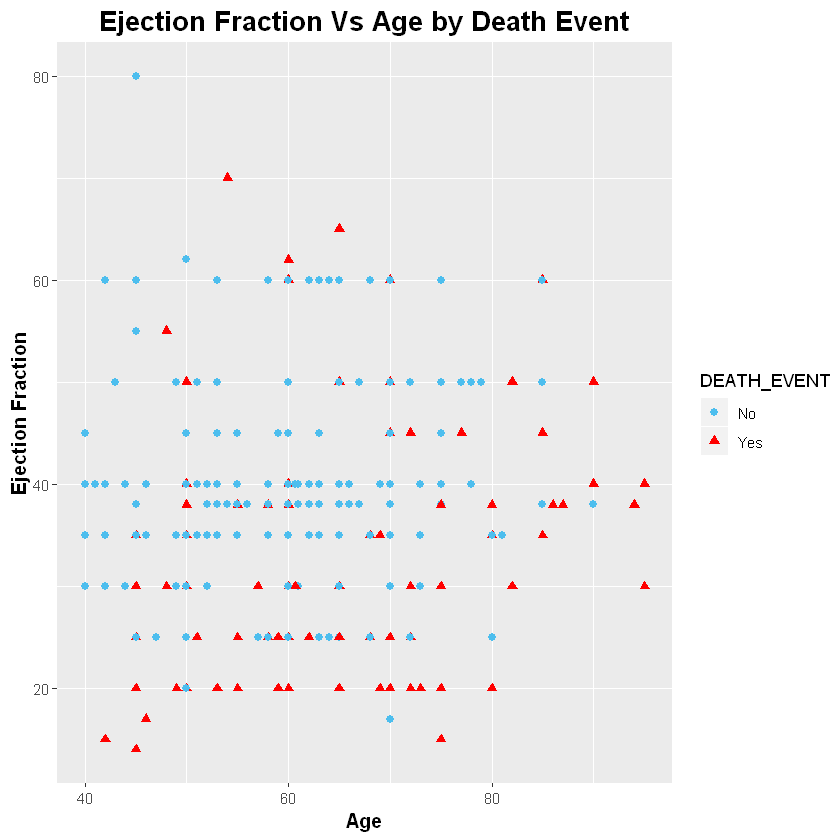

In [12]:
#Scatter plot of Ejection Fraction Vs Age by Death event
heart_failure_dataset %>%
  ggplot(aes(x = age, y = ejection_fraction, color = DEATH_EVENT)) +
  geom_point(aes(shape = DEATH_EVENT), size = 2) +
  labs(title = "Ejection Fraction Vs Age by Death Event", x = "Age", y = "Ejection Fraction")+
  theme(plot.title = element_text(face= 'bold', hjust=0.5, size=16),
        axis.title = element_text(face='bold', size=12))+
  scale_color_manual(values = c('Yes' = "red", 'No' ="#4DBEEE"))
  
ggsave("C:\\Users\\moham\\DataScience\\Predictive modeling\\PM_ projects\\Final Project\\ejection_fraction_by_age.jpeg",
       width=10, height=8)


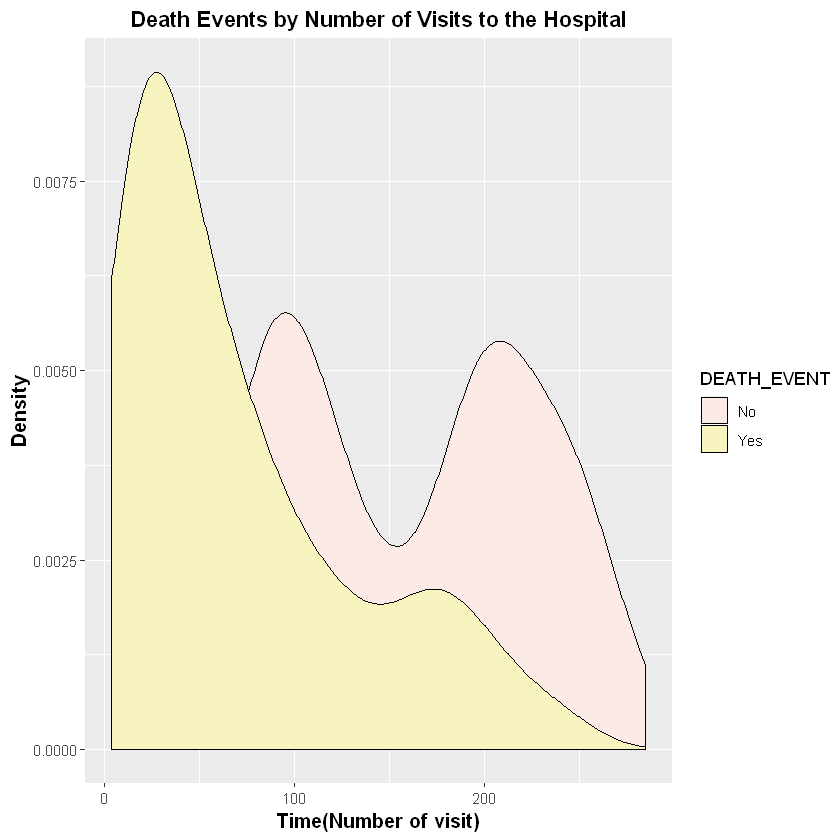

In [13]:
#Density plot of hospital visit by death events
heart_failure_dataset %>%  
ggplot(aes(x=time, fill=DEATH_EVENT))+
  geom_density()+
  scale_fill_manual(values = c('Yes'='#F7F4BF', 'No'='#FCEAE6'))+
  labs(title= "Death Events by Number of Visits to the Hospital", x="Time(Number of visit)", y="Density")+
  theme(plot.title = element_text(face= 'bold', hjust=0.5),
        axis.title = element_text(face='bold',size=12))
ggsave("C:\\Users\\moham\\DataScience\\Predictive modeling\\PM_ projects\\Final Project\\ejection fraction by age.jpeg", width=8, height=3)


In [14]:
#Explore graph using all variables
# heart_failure_dataset %>% explore_all(target=DEATH_EVENT)

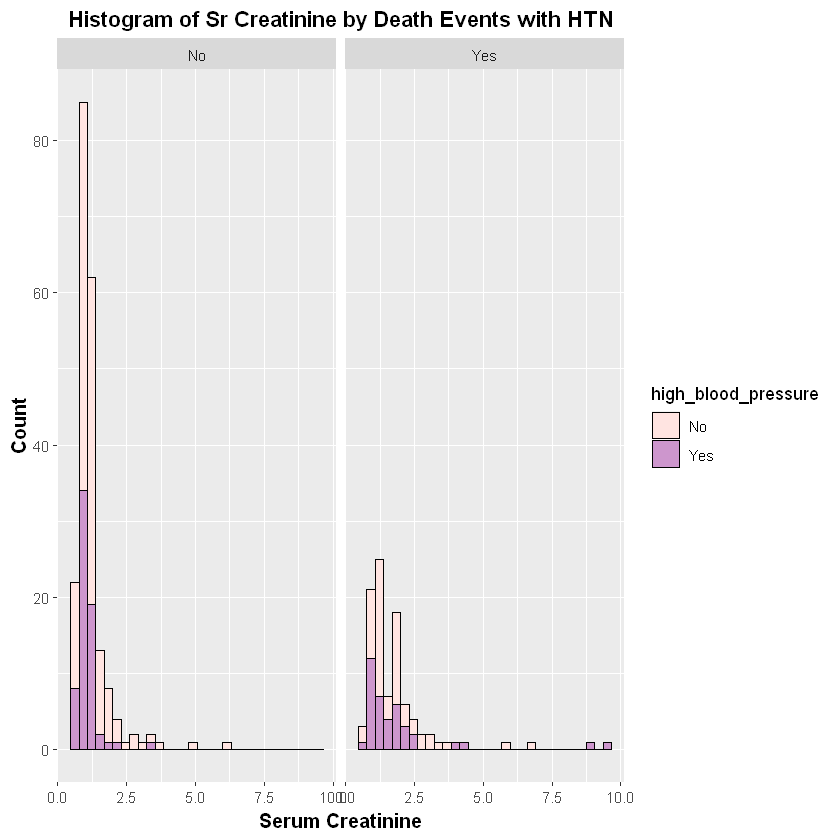

In [15]:
#Histogram of serum creatinine by death events with high blood pressure

heart_failure_dataset %>% 
  ggplot(aes(x=serum_creatinine, fill=high_blood_pressure))+
  geom_histogram(color= 'black', bins=30)+
  facet_wrap(~ DEATH_EVENT)+
  scale_fill_manual(values= c('No' = 'mistyrose', 'Yes'= 'plum3'))+
  labs(title= 'Histogram of Sr Creatinine by Death Events with HTN',
       x= 'Serum Creatinine',
       y= 'Count')+
  theme(plot.title = element_text(face= 'bold', hjust=0.5),
        axis.title = element_text(face='bold',size=12))

ggsave("C:\\Users\\moham\\DataScience\\Predictive modeling\\PM_ projects\\Final Project\\creatbyhtn.jpeg", width=6, height=2)


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

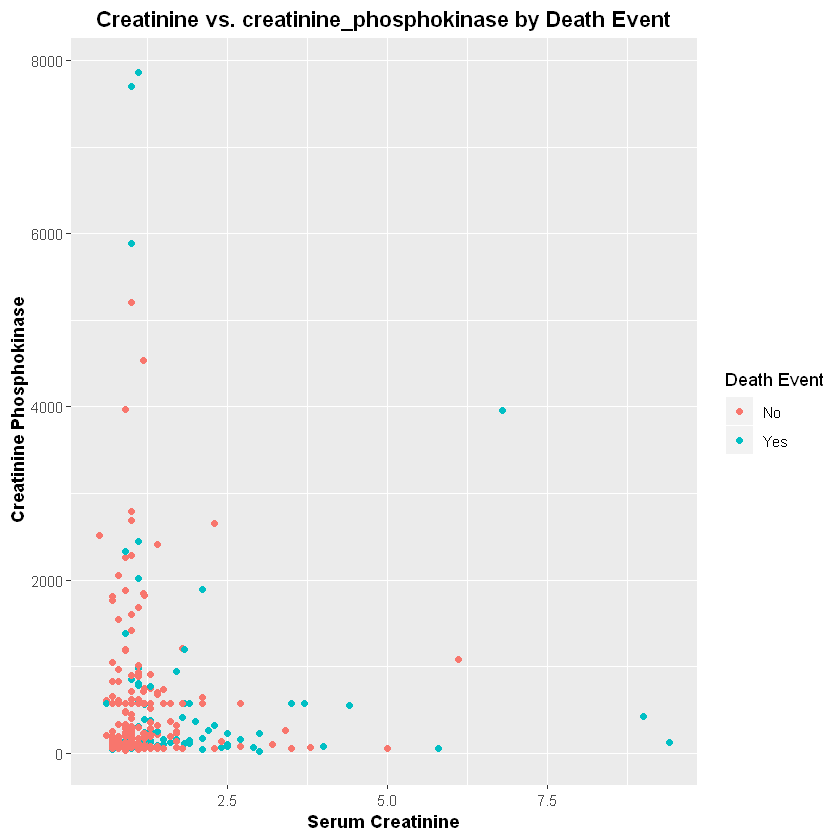

In [16]:
suppressWarnings({
    
# scatter plot of serum creatinine by creatinine_phosphokinase filled with death events
heart_failure_dataset %>% 
ggplot(aes(x = serum_creatinine,y= creatinine_phosphokinase, color = DEATH_EVENT)) +
  geom_point() +
  labs(
    title = "Creatinine vs. creatinine_phosphokinase by Death Event",
    x = 'Serum Creatinine',
    y = " Creatinine Phosphokinase",
    color = "Death Event"
  ) +
  theme(plot.title = element_text(hjust=0.5, face='bold'),
        axis.title =  element_text(face='bold'),
        legend.title  = element_text((face='bold')))
})

In [17]:

# converting the categorical column to numeric column
heart_failure_dataset$anaemia <- as.numeric(heart_failure_dataset$anaemia == "Yes")
heart_failure_dataset$diabetes <- as.numeric(heart_failure_dataset$diabetes == 'Yes')
heart_failure_dataset$high_blood_pressure <- as.numeric(heart_failure_dataset$high_blood_pressure == "Yes")
heart_failure_dataset$smoking <- as.numeric(heart_failure_dataset$smoking == "Yes")
heart_failure_dataset$gender <- as.numeric(heart_failure_dataset$gender == 'Male')
heart_failure_dataset$DEATH_EVENT <- as.factor(heart_failure_dataset$DEATH_EVENT)


In [18]:
# Seprate the numerical columns 
numeric_variable <- sapply(heart_failure_dataset, is.numeric)
numeric_col <- heart_failure_dataset[, numeric_variable]
colnames(numeric_col)


[1] "age"                      "anaemia"                 
 [3] "creatinine_phosphokinase" "diabetes"                
 [5] "ejection_fraction"        "high_blood_pressure"     
 [7] "platelets"                "serum_creatinine"        
 [9] "serum_sodium"             "gender"                  
[11] "smoking"                  "time"

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""hc.order" is not a graphical parameter"Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""hc.order" is not a graphical parameter"Warning message in title(title, ...):
""hc.order" is not a graphical parameter"

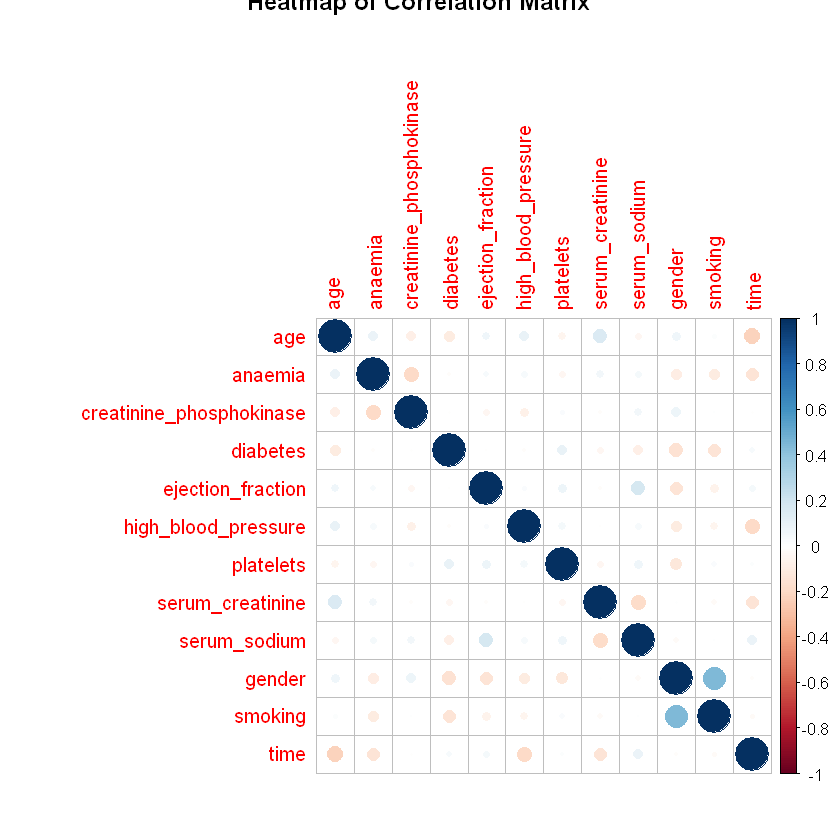

In [19]:
#calculate the correlation of matrix
cor_matrix <- cor(numeric_col)

# Extract column names for the heatmap
newcolnames <- colnames(cor_matrix)

# Create the heatmap with text labels
corrplot(cor_matrix, hc.order = TRUE, diag = TRUE,
          title = "Heatmap of Correlation Matrix")

## Prepare the model 

In [20]:
 ## Split the data set
set.seed(123)
training_set <- createDataPartition(heart_failure_dataset$DEATH_EVENT, p=0.70, list=FALSE)

#70% of training dset
training_data <- heart_failure_dataset[training_set, ]

# 30% of test data
test_data <- heart_failure_dataset[-training_set, ]

##  Logistic Regression Model

In [21]:
logistic_model <- train(DEATH_EVENT ~ .,
                        data= training_data,
                        method = 'glm',
                        family= binomial(link= 'logit'))
summary(logistic_model)



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4218  -0.5529  -0.2030   0.4089   2.2795  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.133e+01  8.639e+00   1.312 0.189670    
age                       6.125e-02  2.004e-02   3.056 0.002245 ** 
anaemia                   1.185e-01  4.449e-01   0.266 0.789894    
creatinine_phosphokinase  5.132e-05  1.998e-04   0.257 0.797260    
diabetes                  1.449e-01  4.473e-01   0.324 0.745966    
ejection_fraction        -9.600e-02  2.189e-02  -4.386 1.16e-05 ***
high_blood_pressure       1.264e-01  4.578e-01   0.276 0.782457    
platelets                 1.808e-06  2.204e-06   0.820 0.412050    
serum_creatinine          8.225e-01  2.290e-01   3.591 0.000329 ***
serum_sodium             -8.654e-02  5.980e-02  -1.447 0.147820    
gender                   -1.154e-01  5.137e-01  -0.225 0.822199    
smoking                  -2.017e-01  5.169e

In [22]:
#Predict on the test dataset
log_pred <- predict(logistic_model, newdata = test_data)

# Create confusion matrix for logistic model
log_cm<- confusionMatrix(log_pred, test_data$DEATH_EVENT)

In [23]:
#Display the accuracy, precision, recall and F1 score
print("Accuracy:")
log_accuracy<- log_cm$overall["Accuracy"]
print(log_accuracy)

print("Precision:")
print(log_cm$byClass["Precision"])

print("Recall (Sensitivity):")
print(log_cm$byClass["Sensitivity"])

print("F1-Score:")
print(log_cm$byClass["F1"])


[1] "Accuracy:"
 Accuracy 
0.7954545 
[1] "Precision:"
Precision 
     0.85 
[1] "Recall (Sensitivity):"
Sensitivity 
       0.85 
[1] "F1-Score:"
  F1 
0.85 


In [24]:
#Create the ROC curve and calculate the AUC
roc_lr <- roc(as.numeric(log_pred), as.numeric(test_data$DEATH_EVENT))
# print("AUC(Area Under the ROC Curve):")
# print(auc(roc_lr))

# plot(roc_lr, main = "ROC Curve", col = "blue", lwd = 2)

## Decision Tree Model

In [37]:
# using specific predictors for test data
test_data <- select(heart_failure_dataset, age, ejection_fraction, serum_creatinine, time, high_blood_pressure, DEATH_EVENT)


In [38]:
# Define the hyperparameter grid
param_grid <- expand.grid(cp = seq(0.01, 0.5, by = 0.01))

# Create a train control object for cross-validation
ctrl <- trainControl(method = "cv", number = 5)

# Perform hyperparameter tuning using caret's train function

dt_model <- train(DEATH_EVENT ~ age + ejection_fraction + serum_creatinine + time + high_blood_pressure ,
                   data = training_data,
                   method = "rpart", # rpart classification and regression trees
                   tuneGrid = param_grid,
                   trControl = ctrl)

dt_model

CART 

211 samples
  5 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 168, 170, 169, 169, 168 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.01  0.8244200  0.5994547
  0.02  0.8290711  0.6089466
  0.03  0.8290711  0.6089466
  0.04  0.8290711  0.6089466
  0.05  0.8290711  0.6089466
  0.06  0.8290711  0.6089466
  0.07  0.8290711  0.6089466
  0.08  0.8290711  0.6026336
  0.09  0.8290711  0.6026336
  0.10  0.8290711  0.6026336
  0.11  0.8290711  0.6026336
  0.12  0.8290711  0.5949193
  0.13  0.8290711  0.5949193
  0.14  0.8290711  0.5949193
  0.15  0.8388272  0.6007767
  0.16  0.8388272  0.6007767
  0.17  0.8388272  0.6007767
  0.18  0.8388272  0.6007767
  0.19  0.8388272  0.6007767
  0.20  0.8388272  0.6007767
  0.21  0.8388272  0.6007767
  0.22  0.8388272  0.6007767
  0.23  0.8388272  0.6007767
  0.24  0.8388272  0.6007767
  0.25  0.8388272  0.6007767
  0.26  0.8388272  0.6007767
  0.2

In [39]:
#predict the model on test set
decision_predict <- predict(dt_model, test_data)
dt_cm <- confusionMatrix(decision_predict, test_data$DEATH_EVENT)
dt_cm$table

          Reference
Prediction  No Yes
       No  192  36
       Yes  11  60

In [40]:
print("Accuracy:")
print(dt_cm$overall["Accuracy"])

print("Precision:")
print(dt_cm$byClass["Precision"])

print("Recall (Sensitivity):")
print(dt_cm$byClass["Sensitivity"])

print("F1-Score:")
print(dt_cm$byClass["F1"])





[1] "Accuracy:"
 Accuracy 
0.8428094 
[1] "Precision:"
Precision 
0.8421053 
[1] "Recall (Sensitivity):"
Sensitivity 
  0.9458128 
[1] "F1-Score:"
       F1 
0.8909513 


In [41]:
#Create the ROC curve and calculate the AUC
roc_dt <- roc(as.numeric(decision_predict), as.numeric(test_data$DEATH_EVENT))
# print("AUC(Area Under the ROC Curve):")
# print(auc(roc_dt))

# plot(roc_dt, main = "ROC Curve", col = "blue", lwd = 2)

## Random Forest Model

In [42]:
# Create a grid of hyperparameters for each model
param_grid <- expand.grid(.mtry =c(1,2,3,4,5))

# Create a train control object for cross-validation
ctrl <- trainControl(method = "cv", number = 5)

rf_model <- train(DEATH_EVENT ~ age + ejection_fraction + serum_creatinine + time + high_blood_pressure,
                  data = training_data,
                  method = "rf", 
                  tuneGrid = param_grid,
                  ntree = 500,
                  trControl = ctrl)
rf_model


Random Forest 

211 samples
  5 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 168, 169, 168, 169, 170 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  1     0.8524431  0.6396503
  2     0.8426924  0.6380118
  3     0.8380412  0.6211613
  4     0.8188721  0.5789224
  5     0.8285120  0.5974758

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 1.

In [43]:
rf_predic <- predict(rf_model, test_data)

rf_cm <- confusionMatrix(rf_predic, test_data$DEATH_EVENT)
rf_cm$table



          Reference
Prediction  No Yes
       No  195  11
       Yes   8  85

In [44]:
print("Accuracy:")
print(rf_cm$overall["Accuracy"])

print("Precision:")
print(rf_cm$byClass["Precision"])

print("Recall (Sensitivity):")
print(rf_cm$byClass["Sensitivity"])

print("F1-Score:")
print(rf_cm$byClass["F1"])

[1] "Accuracy:"
 Accuracy 
0.9364548 
[1] "Precision:"
Precision 
0.9466019 
[1] "Recall (Sensitivity):"
Sensitivity 
  0.9605911 
[1] "F1-Score:"
       F1 
0.9535452 


In [45]:
#Create the ROC curve and calculate the AUC
roc_rf <- roc(as.numeric(rf_predic), as.numeric(test_data$DEATH_EVENT))
# print("AUC(Area Under the ROC Curve):")
# print(auc(roc_rf))

# plot(roc_rf, main = "ROC Curve", col = "blue", lwd = 2)


## Support vector Machine

In [46]:
# Support Vector machine

svm_grid <- expand.grid(
  sigma = c(0.1, 1, 10),  # Specify a range of sigma values
  C = c(0.1, 1, 10)      # Specify a range of C values
)
# Create a train control object for cross-validation
ctrl <- trainControl(method = "cv", number = 5)

svm_model <- train(DEATH_EVENT ~ age + ejection_fraction + serum_creatinine + time +high_blood_pressure , 
                   data = training_data,
                   method = "svmRadial", 
                  tuneGrid = svm_grid,
                  trControl = ctrl)


svm_model


Support Vector Machines with Radial Basis Function Kernel 

211 samples
  5 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 168, 170, 169, 169, 168 
Resampling results across tuning parameters:

  sigma  C     Accuracy   Kappa     
   0.1    0.1  0.7155498  0.15714414
   0.1    1.0  0.8152500  0.55567405
   0.1   10.0  0.8343030  0.61323914
   1.0    0.1  0.6777814  0.00000000
   1.0    1.0  0.7627475  0.40063091
   1.0   10.0  0.7388056  0.37064096
  10.0    0.1  0.6777814  0.00000000
  10.0    1.0  0.6778921  0.02065530
  10.0   10.0  0.6873052  0.05895379

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.1 and C = 10.

In [47]:
svm_predict <- predict(svm_model, newdata=test_data)
svm_cm <- confusionMatrix(svm_predict,test_data$DEATH_EVENT )
svm_cm$table



          Reference
Prediction  No Yes
       No  178  18
       Yes  25  78

In [48]:
print("Accuracy:")
print(svm_cm$overall["Accuracy"])

print("Precision:")
print(svm_cm$byClass["Precision"])

print("Recall (Sensitivity):")
print(svm_cm$byClass["Sensitivity"])

print("F1-Score:")
print(svm_cm$byClass["F1"])



[1] "Accuracy:"
 Accuracy 
0.8561873 
[1] "Precision:"
Precision 
0.9081633 
[1] "Recall (Sensitivity):"
Sensitivity 
  0.8768473 
[1] "F1-Score:"
       F1 
0.8922306 


In [49]:
#Create the ROC curve and calculate the AUC
roc_svm <- roc(as.numeric(svm_predict), as.numeric(test_data$DEATH_EVENT))
# print("AUC(Area Under the ROC Curve):")
# print(auc(roc_svm))

# plot(roc_svm, main = "ROC Curve", col = "blue", lwd = 2)


## Comparison Summary table

In [50]:
#Create a data Frame for comparison of accuracy,Precision, F1 score of all four models

df = data.frame(
  "Models" = c("Logistic Regression","Decision Tree CV",  "Random Forest CV", "Support Vector Machine CV"),
  "Accuracy" = c(log_cm$overall['Accuracy'], dt_cm$overall['Accuracy'], rf_cm$overall["Accuracy"], svm_cm$overall["Accuracy"]),
  "Precision" = c(log_cm$byClass['Precision'], dt_cm$byClass['Precision'], rf_cm$byClass['Precision'], svm_cm$byClass['Precision']),
  "Recall" = c(log_cm$byClass['Recall'], dt_cm$byClass['Recall'],rf_cm$byClass['Recall'], svm_cm$byClass['Recall']),
  "F1 Score" = c(log_cm$byClass['F1'], rf_cm$byClass['F1'],rf_cm$byClass['F1'], svm_cm$byClass['F1']),
     "AUC" = c(auc(roc_lr), auc(roc_dt), auc(roc_rf), auc(roc_svm))
)

df

Models,Accuracy,Precision,Recall,F1.Score,AUC
Logistic Regression,0.7954545,0.8500000,0.8500000,0.8500000,0.7642857
Decision Tree CV,0.8428094,0.8421053,0.9458128,0.9535452,0.8435878
Random Forest CV,0.9364548,0.9466019,0.9605911,0.9535452,0.9302902
Support Vector Machine CV,0.8561873,0.9081633,0.8768473,0.8922306,0.8327224


png 
  2

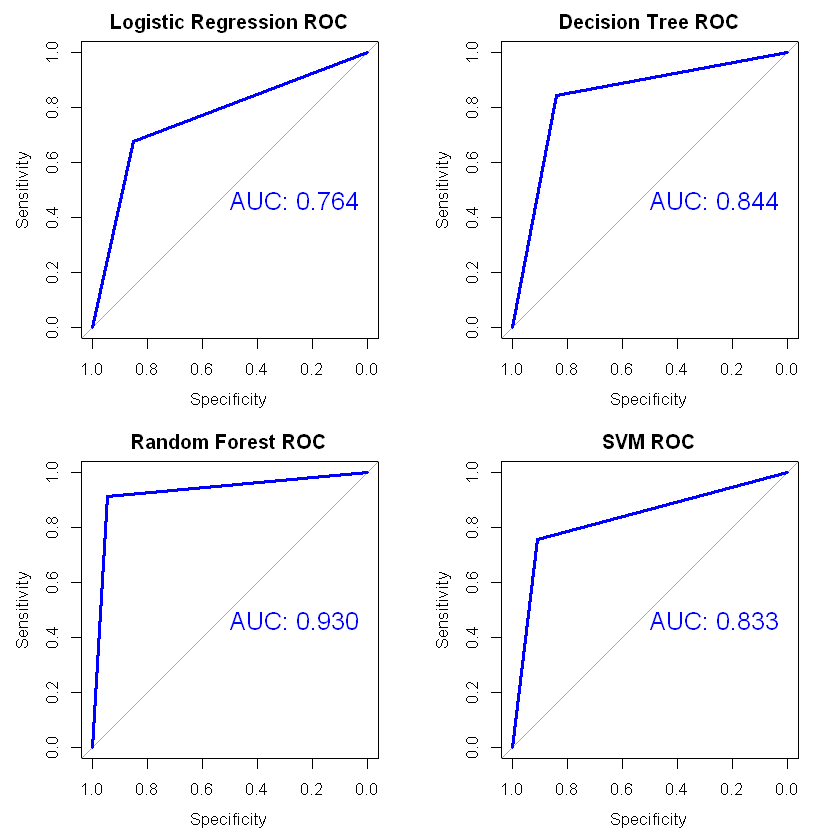

In [51]:
#To avoid the warning used suppressed warining function
suppressWarnings({

# Plot the ROC curves
par(mfrow = c(2, 2))
plot(roc_lr, main = "Logistic Regression ROC", col = "blue", lwd = 3,
     print.auc = TRUE, print.auc.coords = c(0.6, 0.4), print.auc.cex = 1.5, print.auc.font = 2)
plot(roc_dt, main = "Decision Tree ROC", col = "blue", lwd = 3,
     print.auc = TRUE, print.auc.coords = c(0.6, 0.4), print.auc.cex = 1.5, print.auc.font = 2)
plot(roc_rf, main = "Random Forest ROC", col = "blue", lwd = 3,
     print.auc = TRUE, print.auc.coords = c(0.6, 0.4), print.auc.cex = 1.5, print.auc.font = 2)
plot(roc_svm, main = "SVM ROC", col = "blue", lwd = 3,
     print.auc = TRUE, print.auc.coords = c(0.6, 0.4), print.auc.cex = 1.5, print.auc.font = 2)

# Save the plots
dev.copy(png, "C:\\Users\\moham\\DataScience\\Predictive modeling\\PM_ projects\\Final Project\\ROC_plots.png")
dev.off()
    
    
})



